In [ ]:
dir = '/content/drive/MyDrive/cell_images'

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
def model_build():
    
    model = tf.keras.Sequential([

      tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Dropout(0.2),
    
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Dropout(0.2),
    
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model,model.summary()

In [ ]:
model,summary=model_build()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                        

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
ACCURACY_THRESHOLD = 0.97
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
          print("stopping training")   
          self.model.stop_training = True

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_data = train_datagen.flow_from_directory(dir, 
                                               target_size=(150, 150), 
                                               color_mode='rgb',
                                               batch_size=128, 
                                               class_mode='binary',
                                               shuffle=True,
                                               subset = 'training') 

val_data = val_datagen.flow_from_directory(dir, 
                                           target_size=(150, 150), 
                                           color_mode='rgb',
                                           batch_size=128, 
                                           class_mode='binary',
                                           shuffle=False,
                                           subset = 'validation')

Found 22056 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [ ]:
import datetime
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,
                                                  histogram_freq=0,
                                                  write_graph=True,
                                                  write_images=True,
                                                  write_steps_per_second=True,
                                                  update_freq='epoch',
                                                  profile_batch=0,
                                                  embeddings_freq=0,
                                                  embeddings_metadata=None)

In [ ]:
callbacks = myCallback()
history=model.fit(
    train_data,
    callbacks=[callbacks,tensorboard_callback],
    epochs=15,
    validation_data=val_data,
    verbose=1,
    batch_size=32
    )

Epoch 1/15
173/173 [==============================] - 219s 1s/step - loss: 0.4743 - accuracy: 0.7971 - val_loss: 3.7040 - val_accuracy: 0.5002
Epoch 2/15
173/173 [==============================] - 202s 1s/step - loss: 0.2371 - accuracy: 0.9166 - val_loss: 1.0173 - val_accuracy: 0.5512
Epoch 3/15
173/173 [==============================] - 189s 1s/step - loss: 0.2032 - accuracy: 0.9304 - val_loss: 0.6407 - val_accuracy: 0.8177
Epoch 4/15
173/173 [==============================] - 186s 1s/step - loss: 0.1743 - accuracy: 0.9435 - val_loss: 0.6522 - val_accuracy: 0.8487
Epoch 5/15
173/173 [==============================] - 187s 1s/step - loss: 0.1634 - accuracy: 0.9456 - val_loss: 0.4823 - val_accuracy: 0.8844
Epoch 6/15
173/173 [==============================] - 187s 1s/step - loss: 0.1564 - accuracy: 0.9496 - val_loss: 0.2622 - val_accuracy: 0.9263
Epoch 7/15
173/173 [==============================] - 194s 1s/step - loss: 0.1463 - accuracy: 0.9529 - val_loss: 0.2600 - val_accuracy: 0.9178

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model.save('/content/drive/MyDrive/malaria_model_cnn.h5')

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

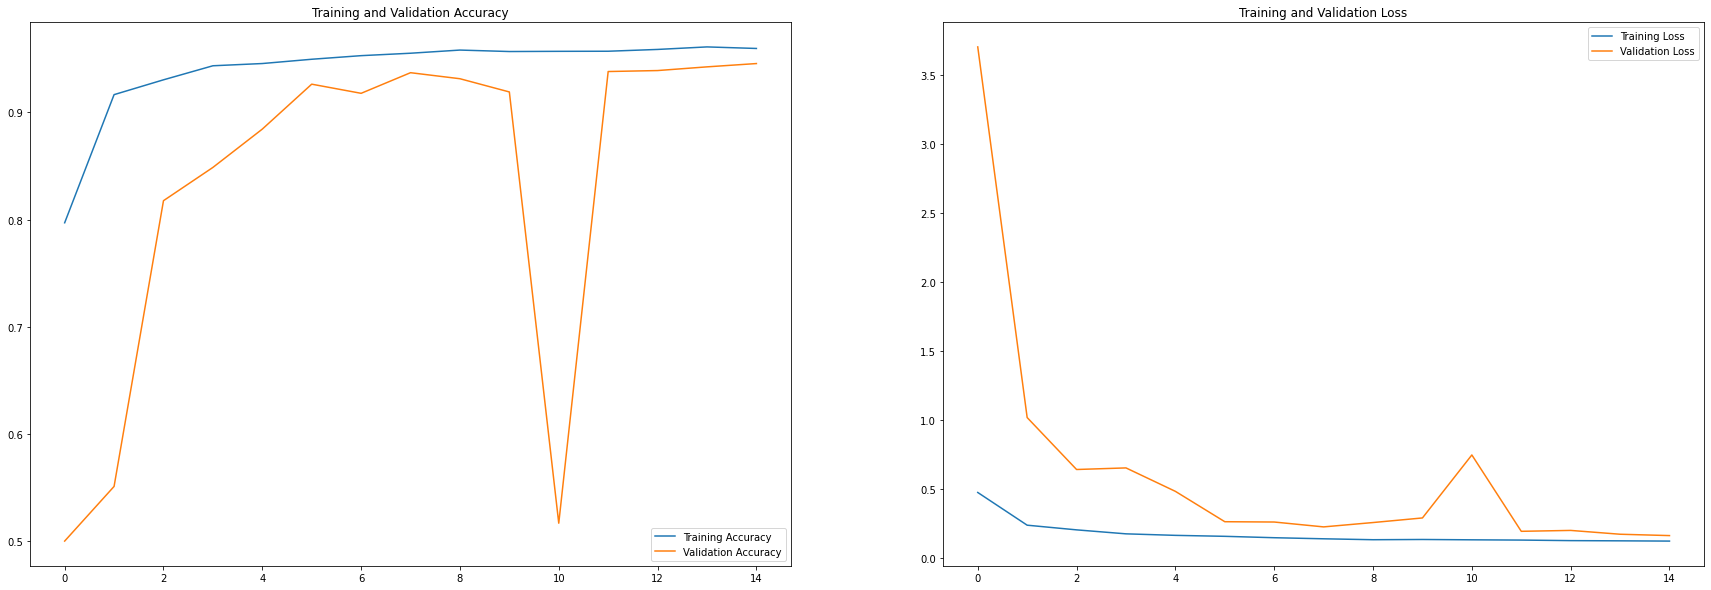

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
import numpy as np
y_pred = np.argmax(y_pred, axis = -1)
orig = np.argmax(val_data, axis=-1)

conf = confusion_matrix(orig, y_pred)

fig, ax = plt.subplots(figsize = (7,7))
ax.matshow(conf, cmap='Pastel1')

ax.set_ylabel('True Values')
ax.set_xlabel('Predicted Values', labelpad = 10)
ax.xaxis.set_label_position('top')
plt.show()